Pretrained models

In [25]:
# Import necessary libraries
from tensorflow.keras.applications import ResNet50, VGG16, VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess
from tensorflow.keras.applications.vgg19 import preprocess_input as vgg19_preprocess
from tensorflow.keras.applications.resnet50 import decode_predictions as resnet_decode
from tensorflow.keras.applications.vgg16 import decode_predictions as vgg16_decode
from tensorflow.keras.applications.vgg19 import decode_predictions as vgg19_decode
from tensorflow.keras.models import Model
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import requests
from io import BytesIO

# Define model selection options
MODEL_NAME = 'ResNet50'  # Change to 'VGG16' or 'VGG19' as desired
print(f"Selected model: {MODEL_NAME}")


Selected model: ResNet50


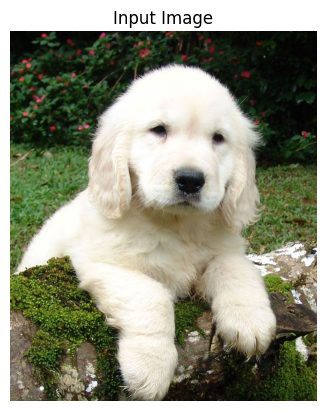

In [31]:
# Download an image
img_url = "https://upload.wikimedia.org/wikipedia/commons/6/6e/Golde33443.jpg"
response = requests.get(img_url)
img = Image.open(BytesIO(response.content))

# Display the image
plt.imshow(img)
plt.axis('off')
plt.title("Input Image")
plt.show()


In [32]:
# Model loading and preprocessing setup
if MODEL_NAME == 'ResNet50':
    model = ResNet50(weights='imagenet')
    preprocess = resnet_preprocess
    decode = resnet_decode
elif MODEL_NAME == 'VGG16':
    model = VGG16(weights='imagenet')
    preprocess = vgg16_preprocess
    decode = vgg16_decode
elif MODEL_NAME == 'VGG19':
    model = VGG19(weights='imagenet')
    preprocess = vgg19_preprocess
    decode = vgg19_decode
else:
    raise ValueError("Invalid model name. Choose 'ResNet50', 'VGG16', or 'VGG19'.")

# Modify model for feature extraction by removing the last layer
model_layer = Model(inputs=model.input, outputs=model.layers[-2].output)
print(f"Loaded model: {MODEL_NAME}")


102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Loaded model: ResNet50


In [33]:
# Preprocess the image
img_resized = img.resize((224, 224))
x = image.img_to_array(img_resized)
x = np.expand_dims(x, axis=0)
x = preprocess(x)

# Predict the class of the image
preds = model.predict(x)
print("Top-3 Predictions:")
for _, class_name, score in decode(preds, top=3)[0]:
    print(f"{class_name}: {score:.2%}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Top-3 Predictions:
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
golden_retriever: 79.54%
kuvasz: 7.76%
Great_Pyrenees: 6.69%


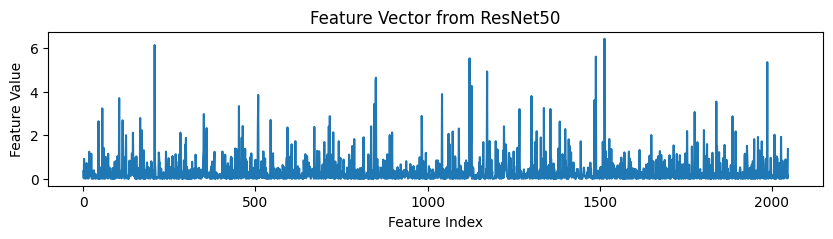

In [36]:
plt.figure(figsize=(10, 2))
plt.plot(features[0])  # Directly plotting the feature vector
plt.title(f"Feature Vector from {MODEL_NAME}")
plt.xlabel("Feature Index")
plt.ylabel("Feature Value")
plt.show()